Context:

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Content:
    
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

Features:


1.ph: pH of 1. water (0 to 14).

2.Hardness: Capacity of water to precipitate soap in mg/L.

3.Solids: Total dissolved solids in ppm.

4.Chloramines: Amount of Chloramines in ppm.

5.Sulfate: Amount of Sulfates dissolved in mg/L.

6.Conductivity: Electrical conductivity of water in μS/cm.

7.Organic_carbon: Amount of organic carbon in ppm.

8.Trihalomethanes: Amount of Trihalomethanes in μg/L.

9.Turbidity: Measure of light emiting property of water in NTU.

10.Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0.

Problem definition:
    
How accurately can we classify whether a sample from a body of water is potable, given its chemical and physical characteristics?

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [65]:
df = pd.read_csv(r"C:\Data\water_potability.csv")
print(df)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [66]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [68]:
df.shape

(3276, 10)

In [69]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

Checking Missing Values:

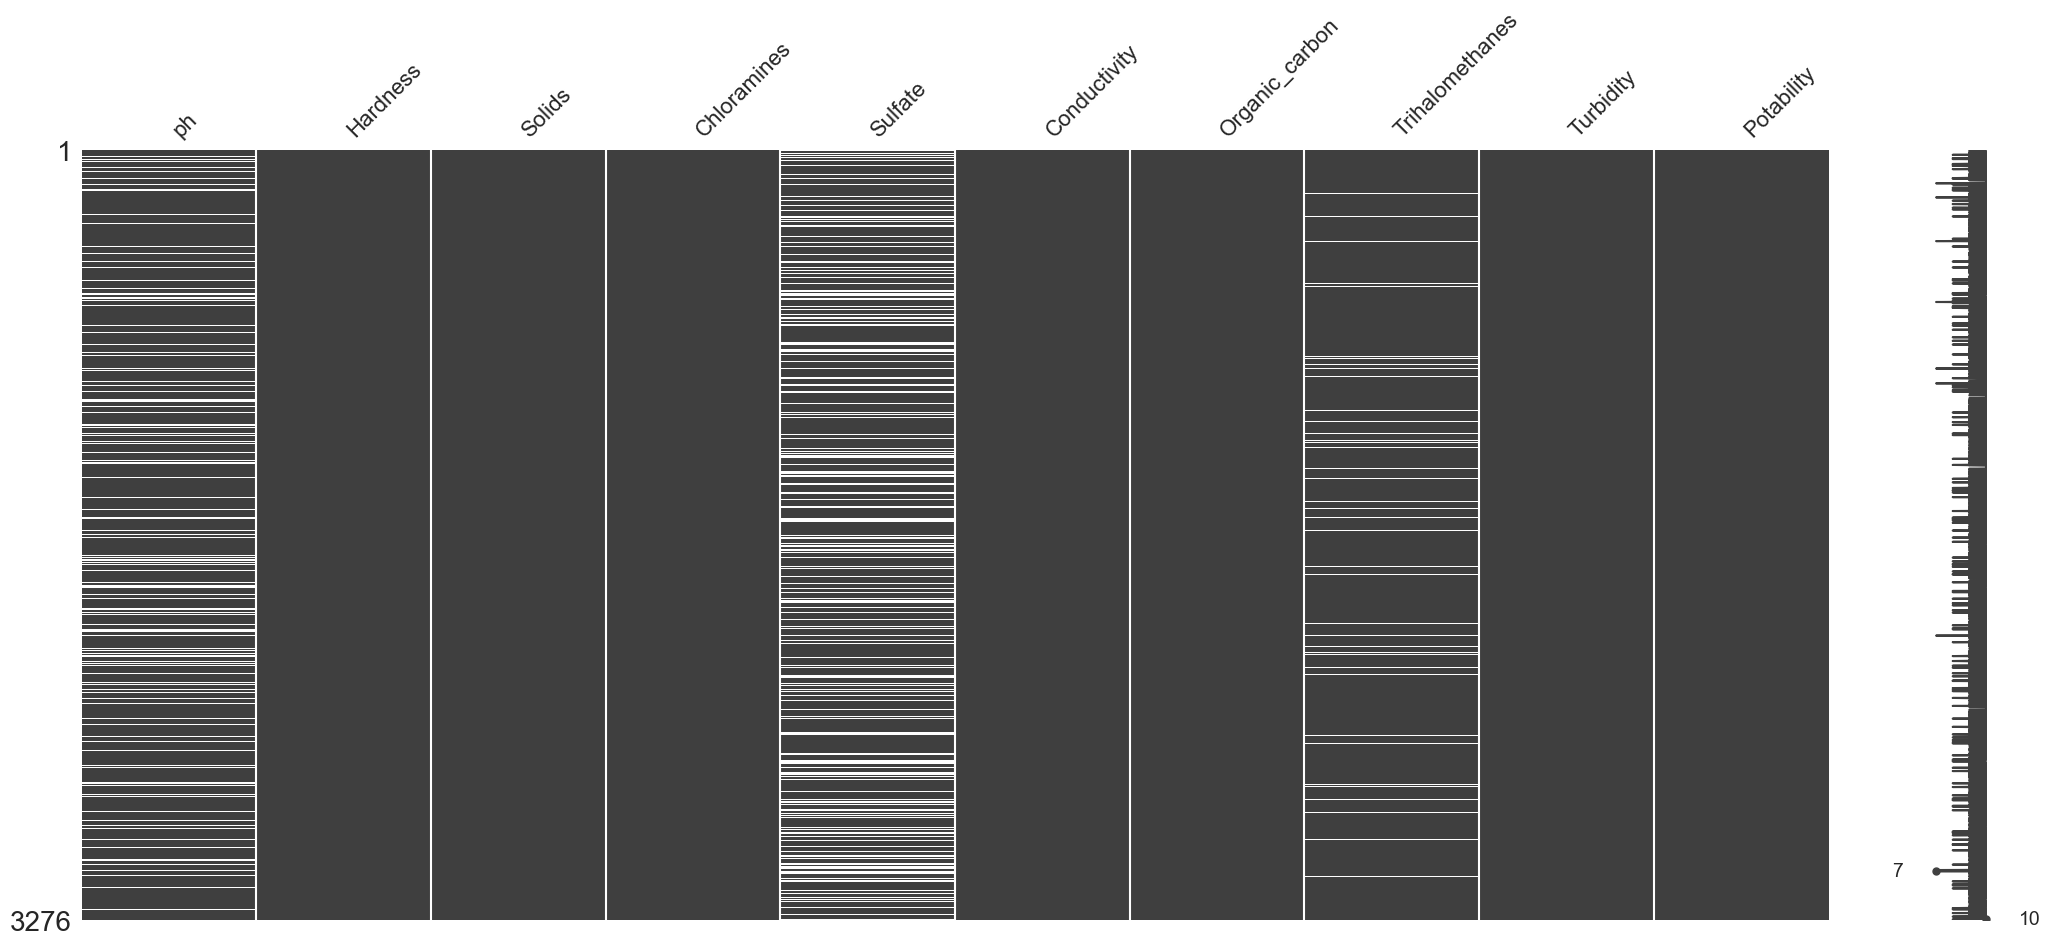

In [70]:
msno.matrix(df)
plt.show()

In [71]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [72]:
# handle missing value with median of features
df['ph'].fillna(df['ph'].median(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)

In [73]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [74]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

In [76]:
correlation = df.corr()['Potability']
correlation.sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006887
Turbidity          0.001581
ph                -0.003014
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020476
Organic_carbon    -0.030001
Name: Potability, dtype: float64

<AxesSubplot:>

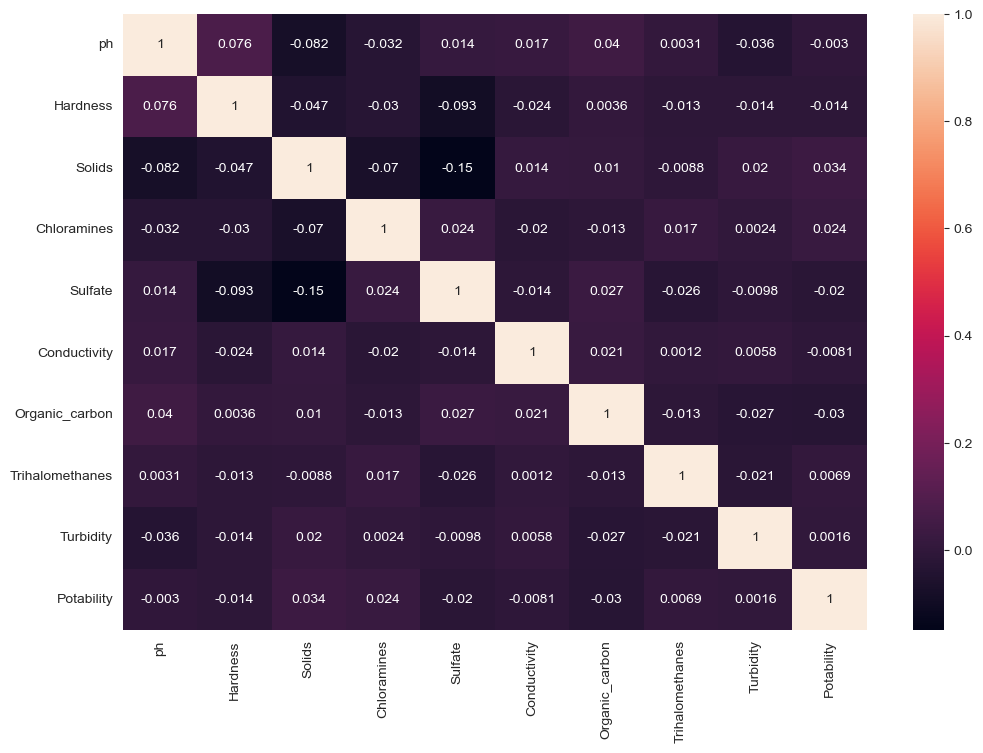

In [77]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

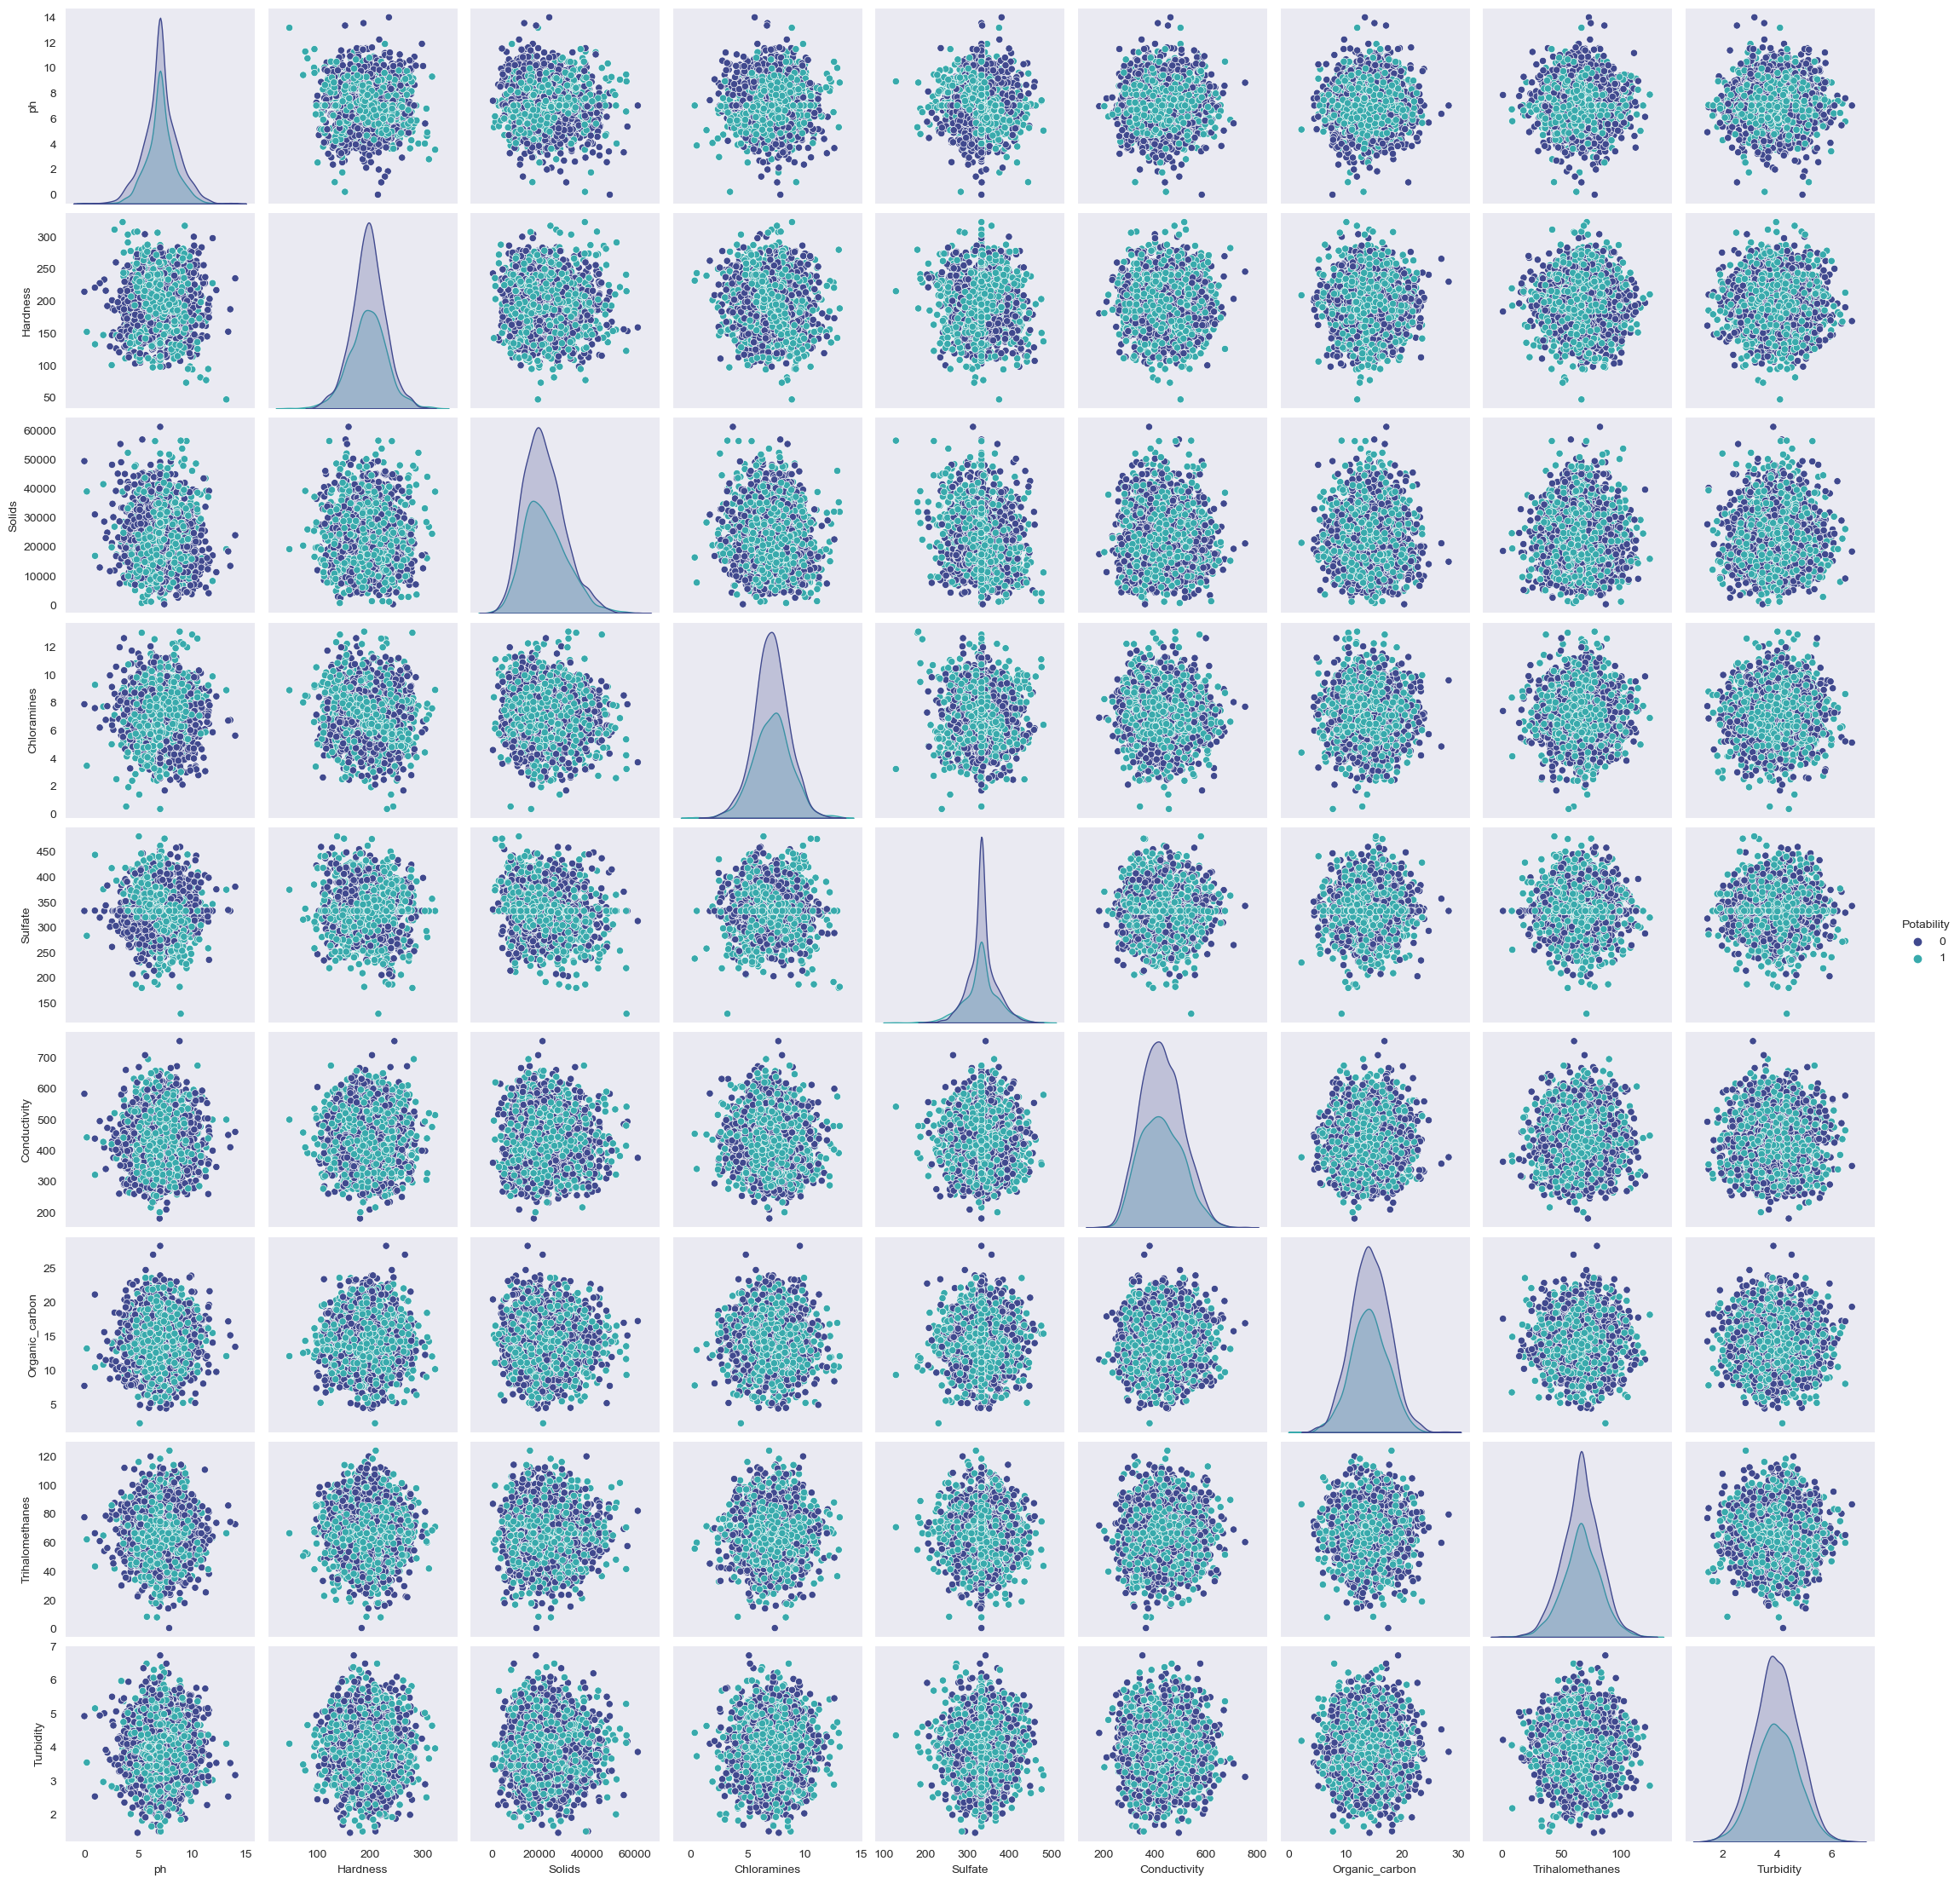

In [78]:
sns.set_style('dark')
sns.pairplot(df, hue='Potability', palette = "mako")

([<matplotlib.patches.Wedge at 0x228165113d0>,
 [Text(-0.3722543665175176, 1.0350974285586076, '0'),
  Text(0.3722543665175174, -1.0350974285586076, '1')],
 [Text(-0.2030478362822823, 0.5645985973956041, '61.0%\n1998'),
  Text(0.2030478362822822, -0.5645985973956041, '39.0%\n1278')])

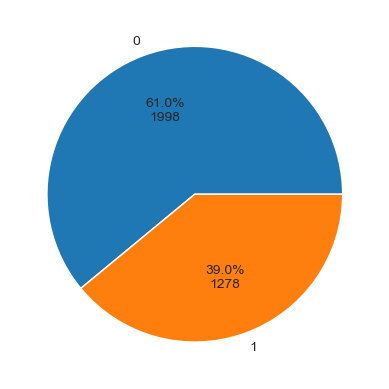

In [79]:
total = df['Potability'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df['Potability'].value_counts().values, labels=df['Potability'].value_counts().index, autopct=fmt)

Plotting the Distribution of Each Variable:

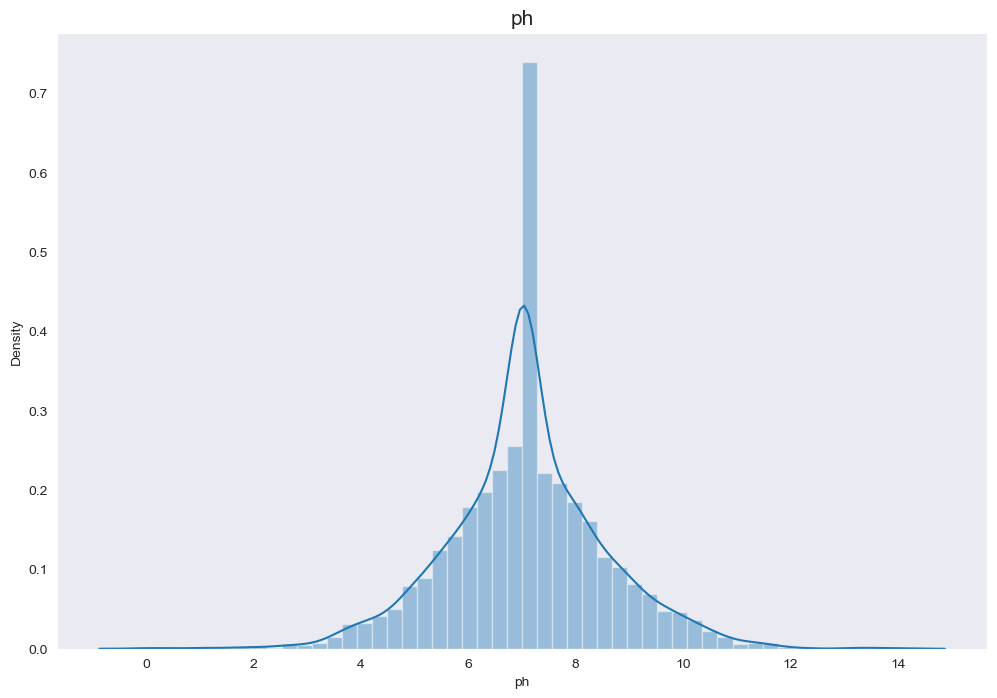

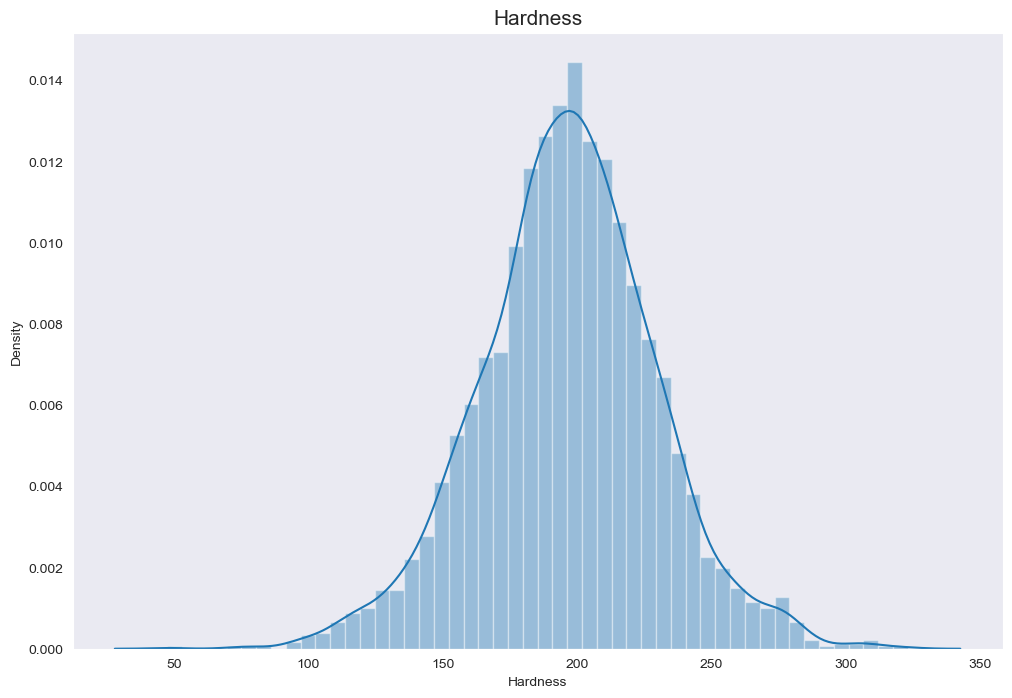

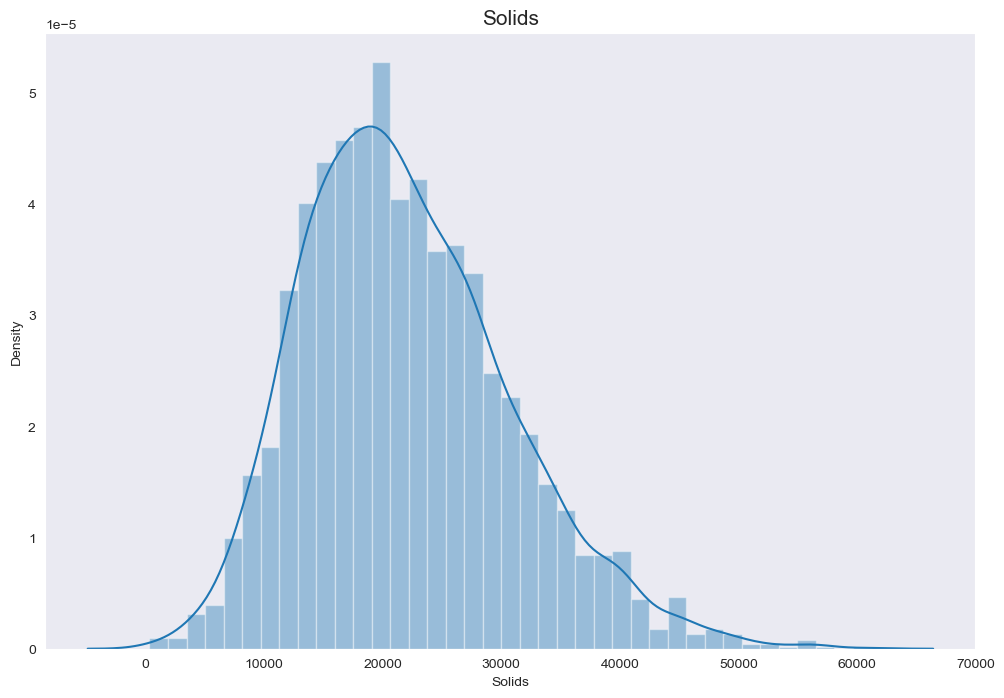

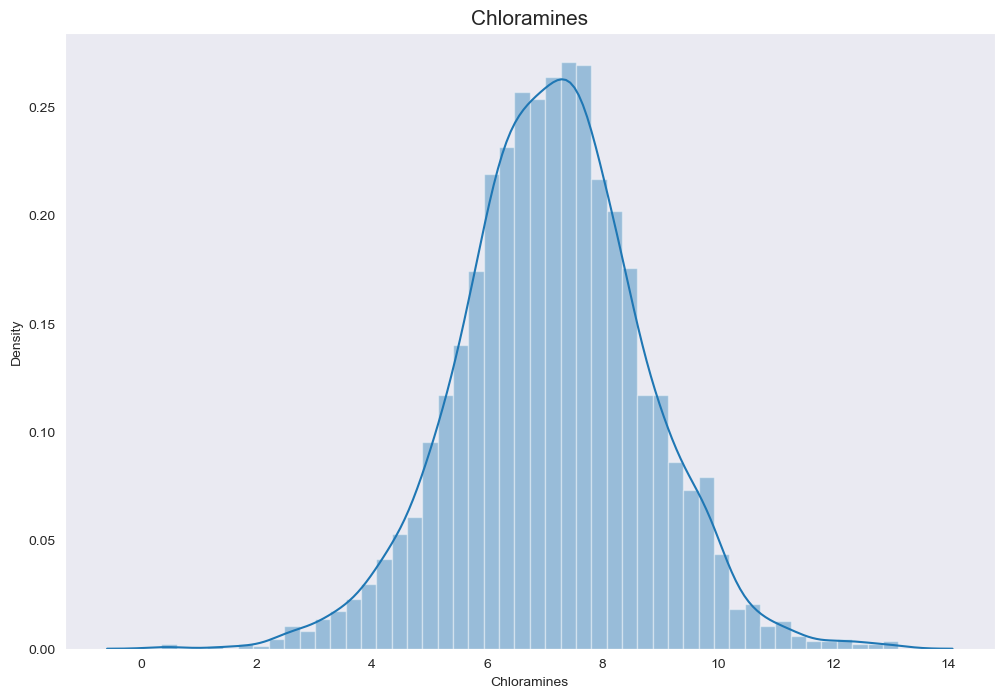

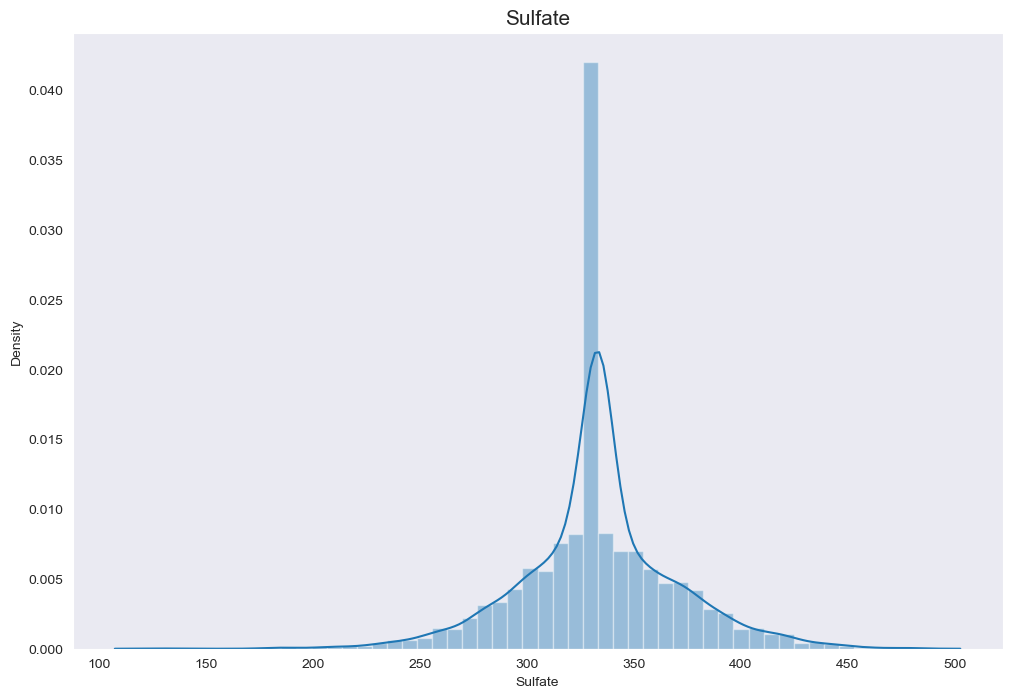

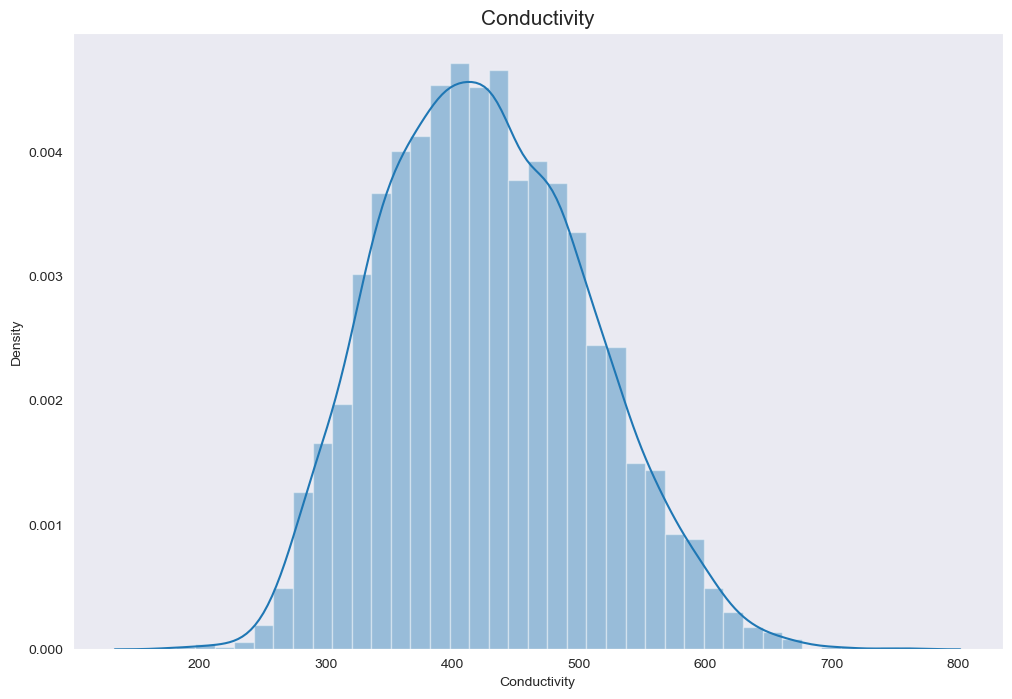

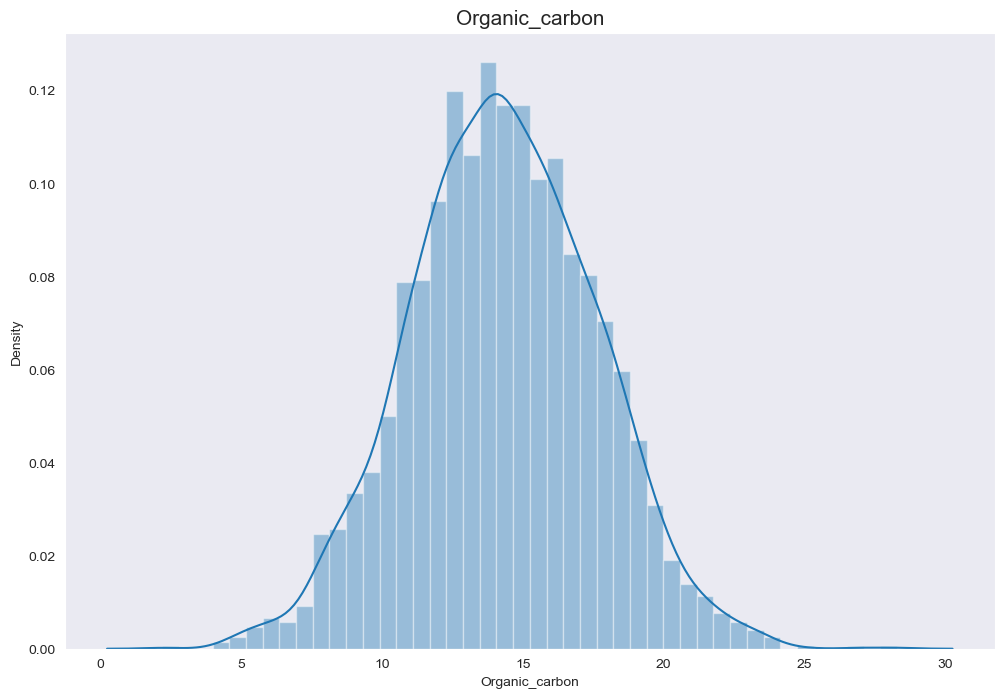

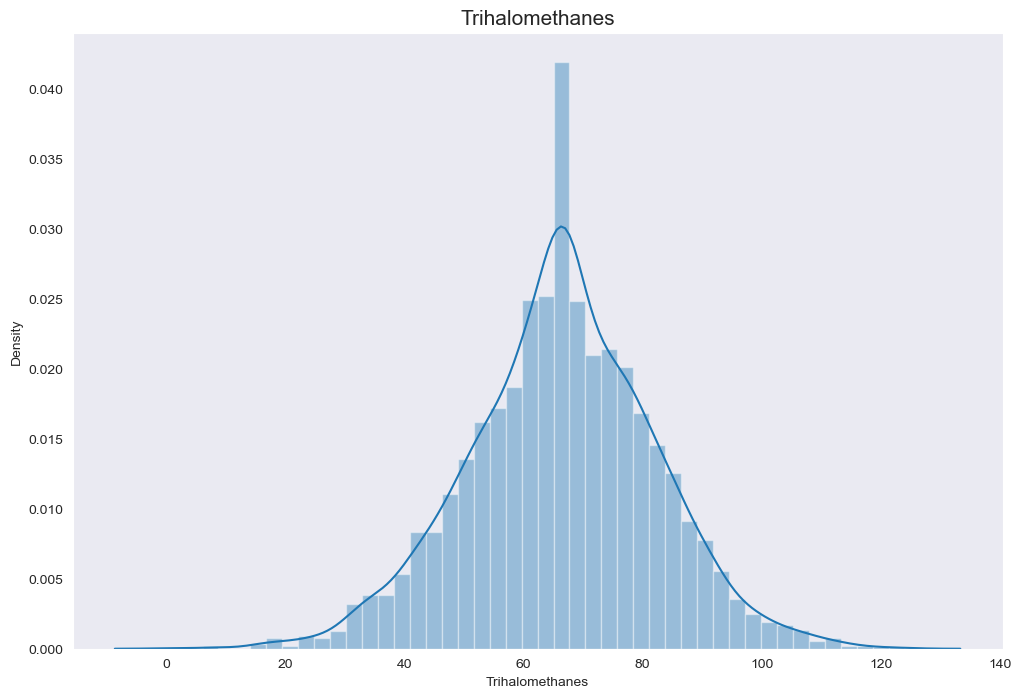

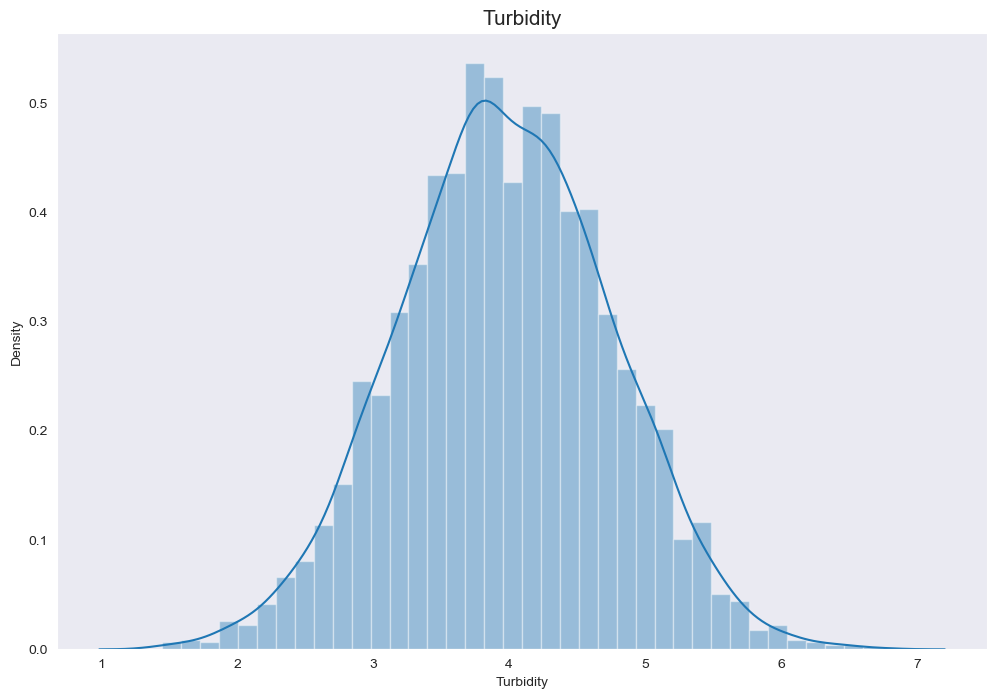

In [80]:
for col in df.drop("Potability", axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()

Relationship Between Each Variable and Target Variable (Potability):

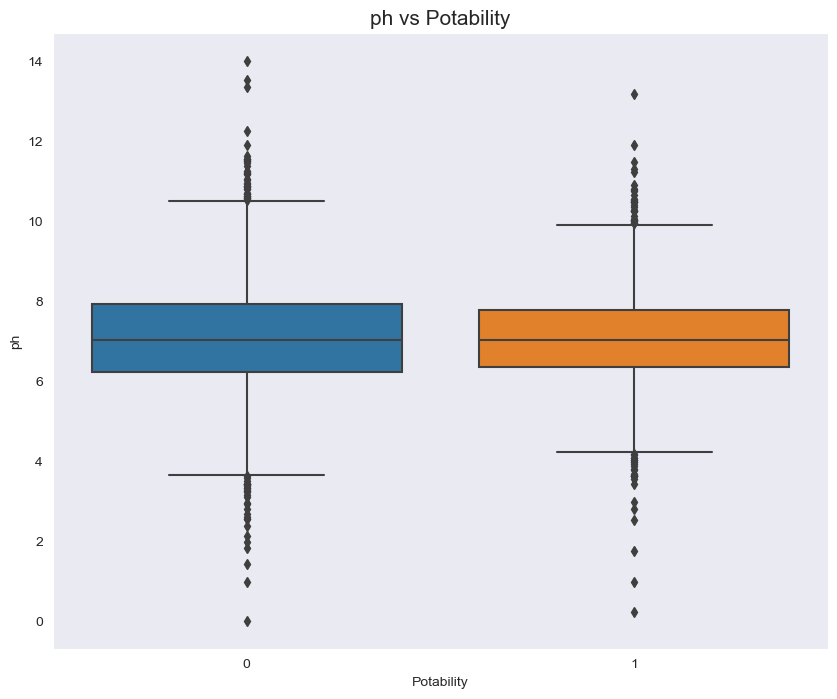

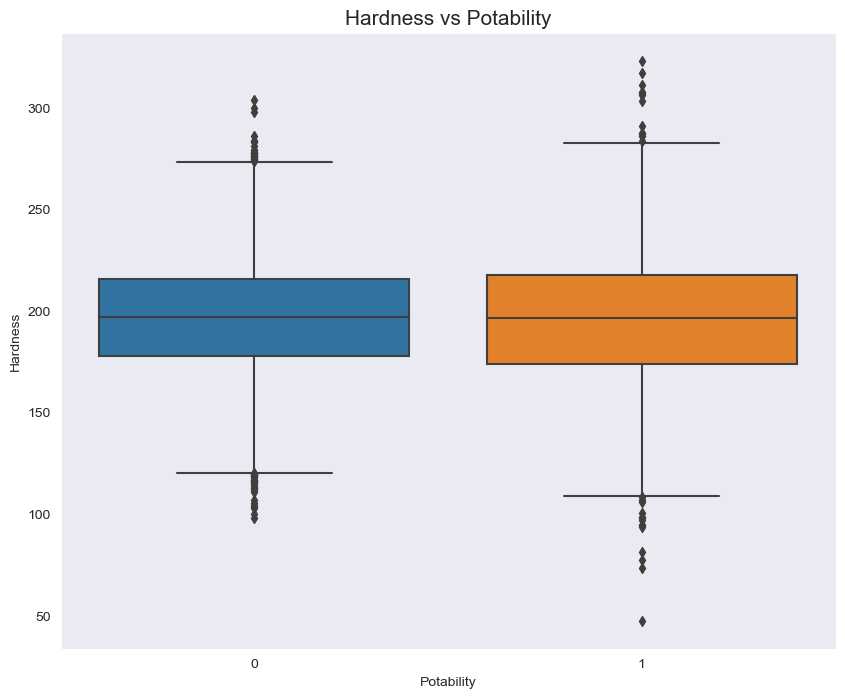

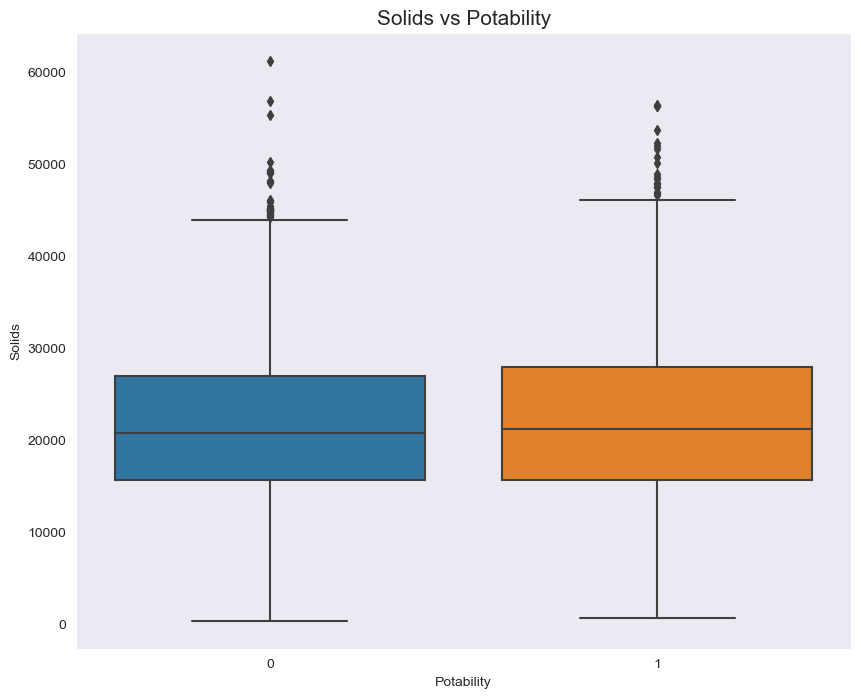

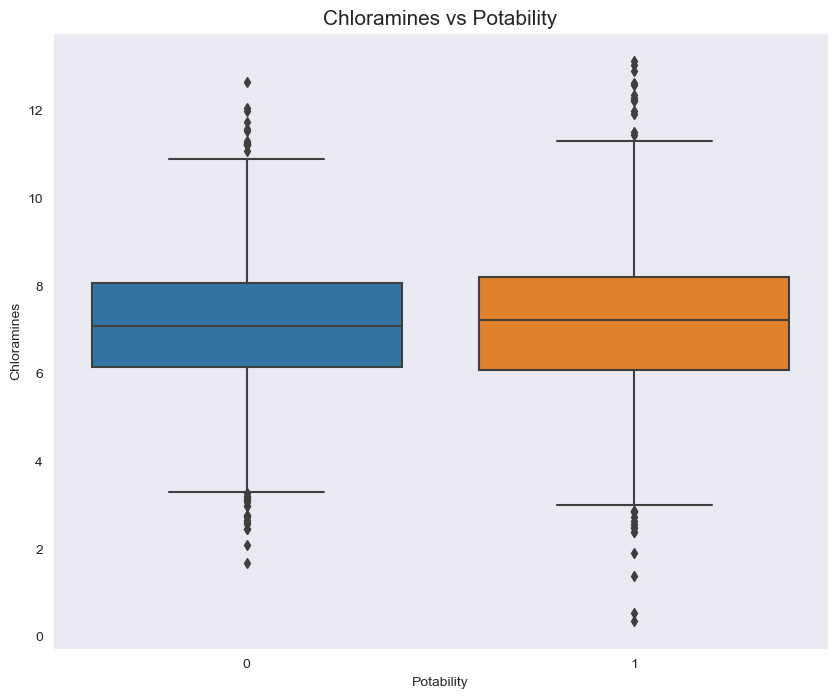

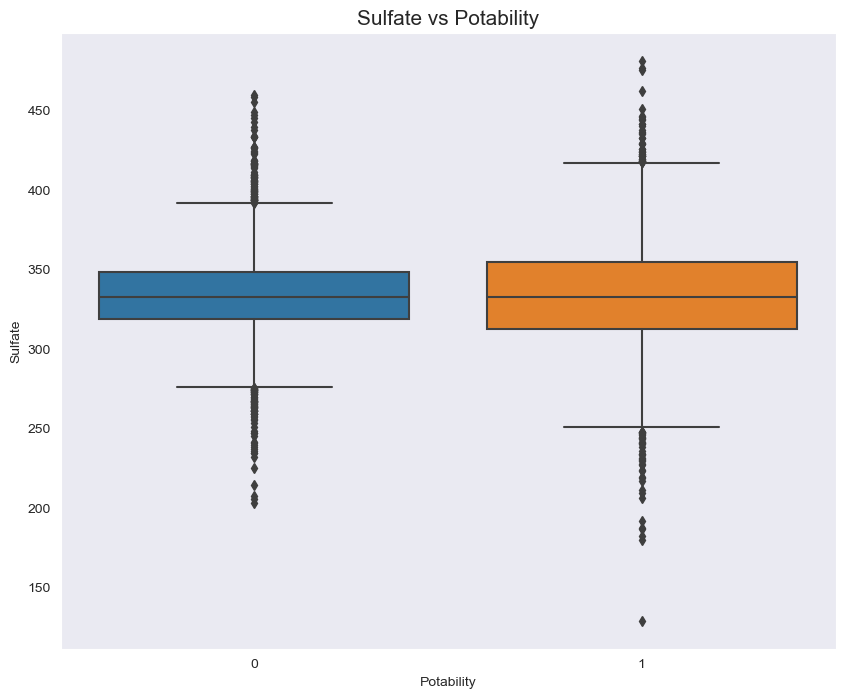

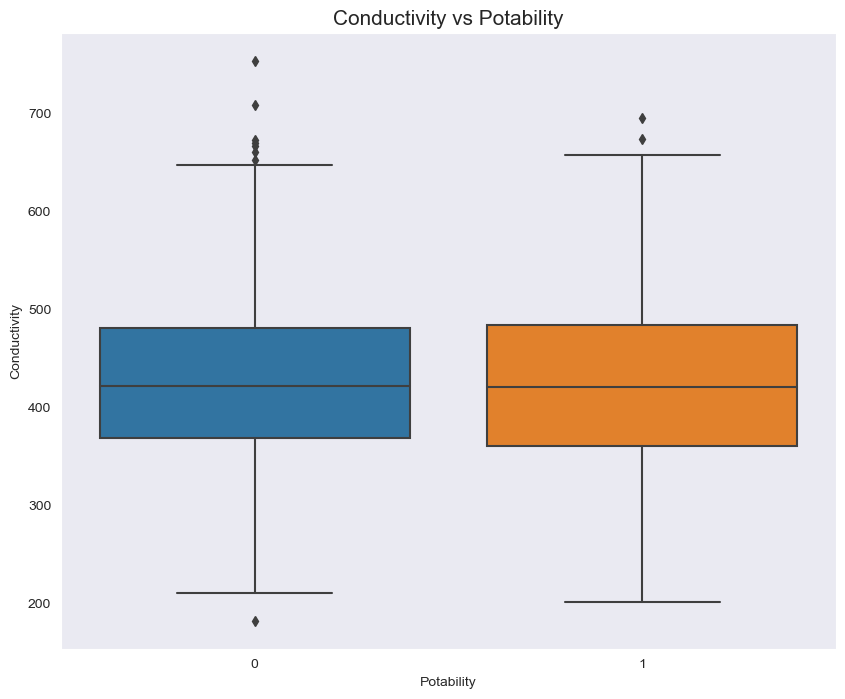

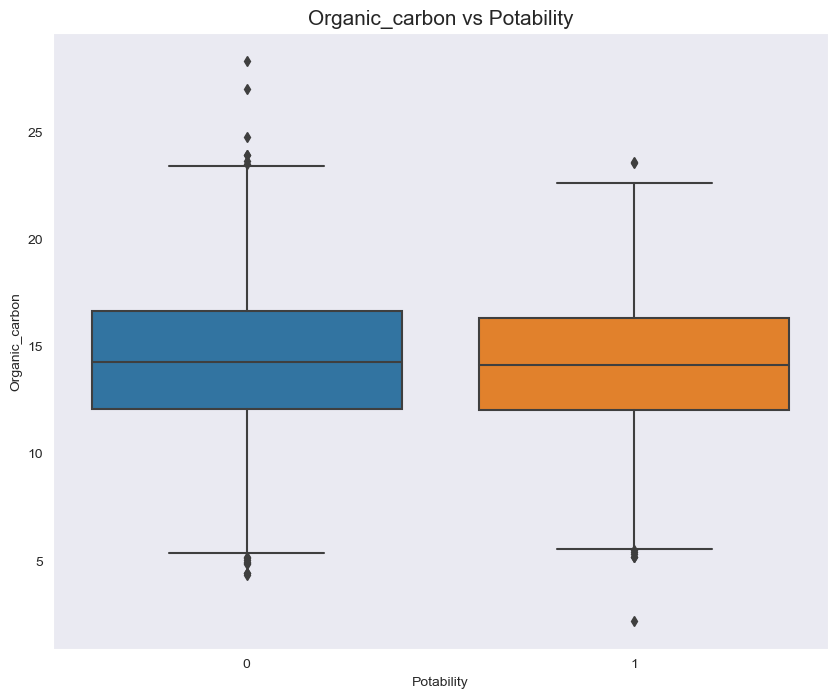

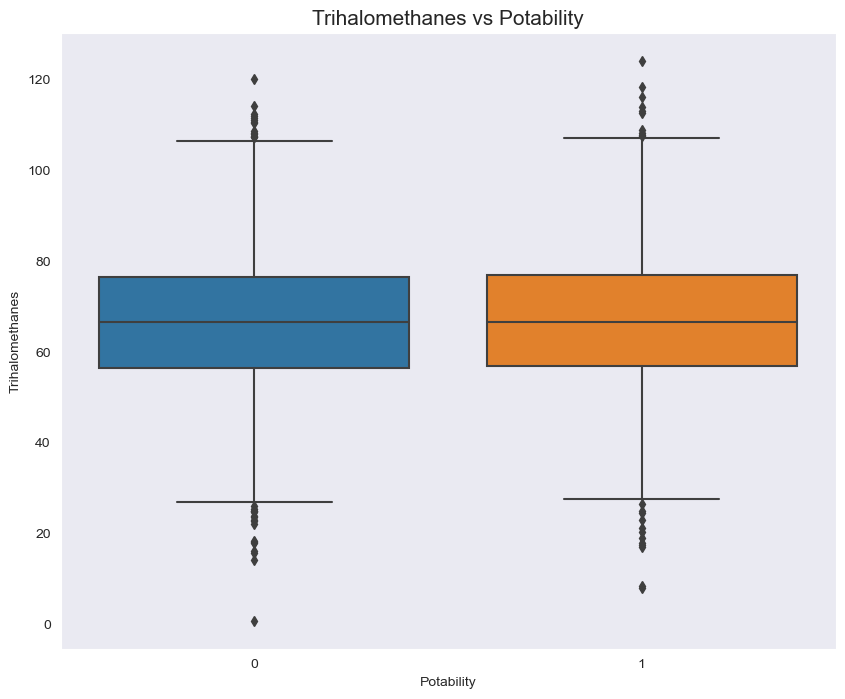

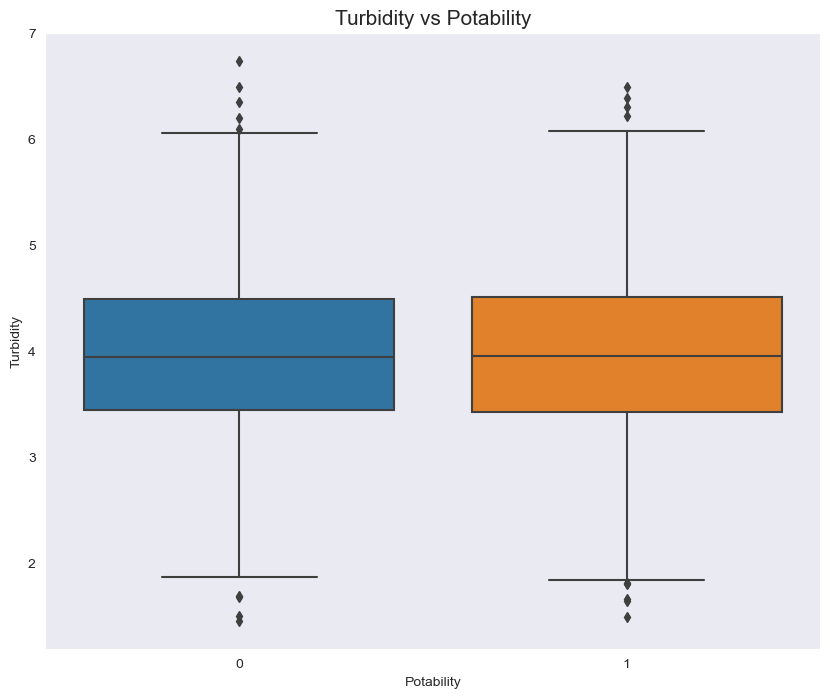

In [81]:
for col in df.drop("Potability", axis=1).columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(df["Potability"], df[col])
    plt.title(f"{col} vs Potability", size=15)
    plt.show()

Splitting, balancing and scaling data:

In [82]:
X = df.drop("Potability", axis=1)
y = df["Potability"]

In [83]:
# Splitting
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=18, stratify=y) #stratify=y

# Balancing data - oversampling minority
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

# Scaling
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Machine Learning Models:

In [84]:
models = pd.DataFrame(columns=["Model", "Accuracy Score"])

In [85]:
model_list = [("Logistic Regression", LogisticRegression(random_state=42)), 
              ("Random Forest", RandomForestClassifier(random_state=42)),
              ("LightGBM", LGBMClassifier(random_state=42)),
              ("Support Vector Machines", SVC(random_state=42)),
              ("XGBoost", XGBClassifier(random_state=42)),
              ("Gaussian Naive Bayes", GaussianNB()),
              ("Bernoulli Naive Bayes", BernoulliNB()),
              ("KNN", KNeighborsClassifier(n_neighbors=2)),
              ("Decision Tree", DecisionTreeClassifier(random_state=42)),
              ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42))]

In [86]:
for name, clf in model_list:
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    
    new_row = {"Model": name, "Accuracy Score": score}
    models = models.append(new_row, ignore_index=True)

In [87]:
models.sort_values(by="Accuracy Score", ascending=False)

Model  Accuracy Score
9       Bagging Classifier        0.664634
2                 LightGBM        0.658537
1            Random Forest        0.650915
7                      KNN        0.637195
4                  XGBoost        0.626524
3  Support Vector Machines        0.623476
8            Decision Tree        0.579268
5     Gaussian Naive Bayes        0.574695
0      Logistic Regression        0.528963
6    Bernoulli Naive Bayes        0.518293

In [92]:
def visualize_roc_auc_curve(model, model_name):
    pred_prob = model.predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
    
    score = roc_auc_score(y_test, pred_prob[:, 1])
    
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, linestyle="--", color="orange", label="ROC AUC Score: (%0.5f)" % score)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    
    plt.title(f"{model_name} ROC Curve", size=15)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", prop={"size": 15})
    plt.show()

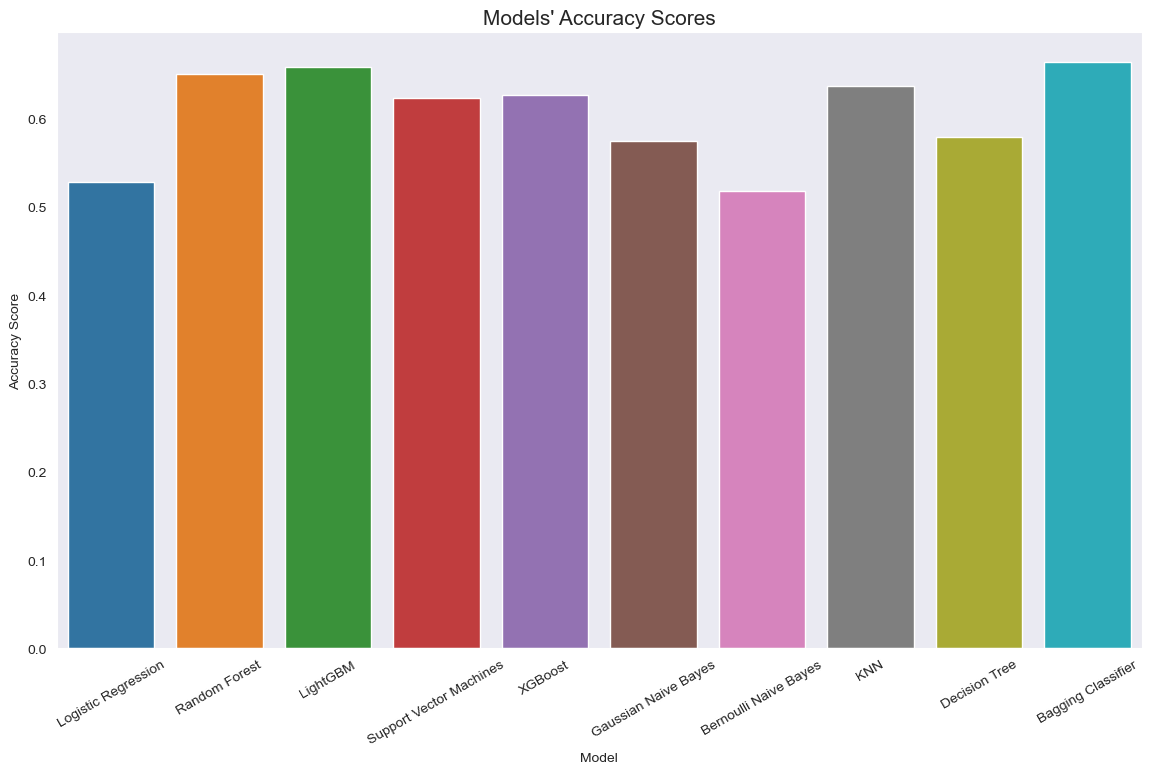

In [93]:
plt.figure(figsize=(14, 8))
sns.barplot(x=models["Model"], y=models["Accuracy Score"])
plt.title("Models' Accuracy Scores", size=15)
plt.xticks(rotation=30)
plt.show()

Confusion Matrix and ROC Curve of Random Forest:

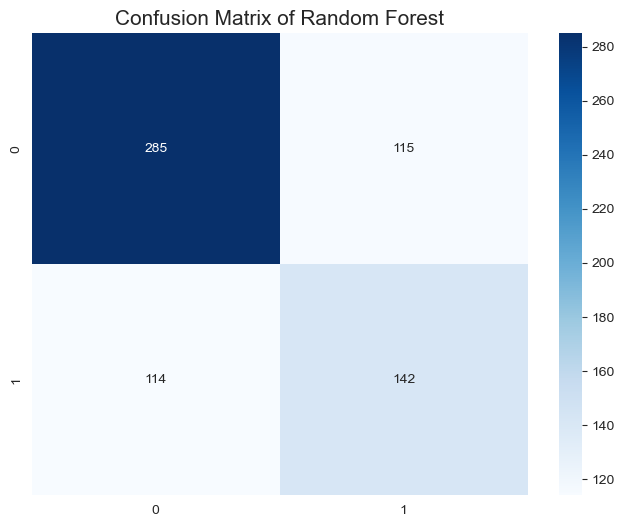

In [94]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

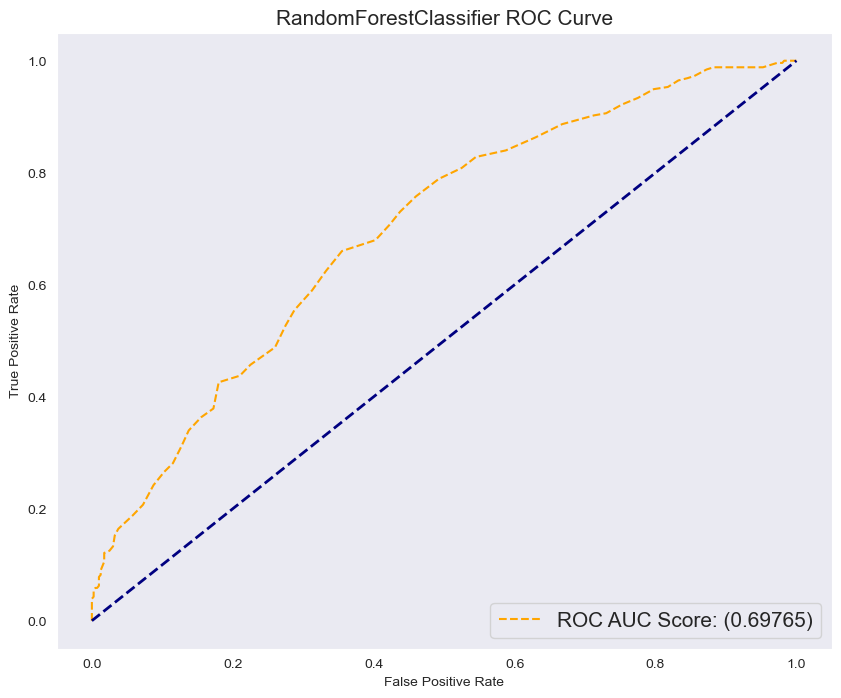

In [95]:
visualize_roc_auc_curve(rf, "RandomForestClassifier")

In [ ]:
Confusion Matrix and ROC Curve of Bagging Classifier:

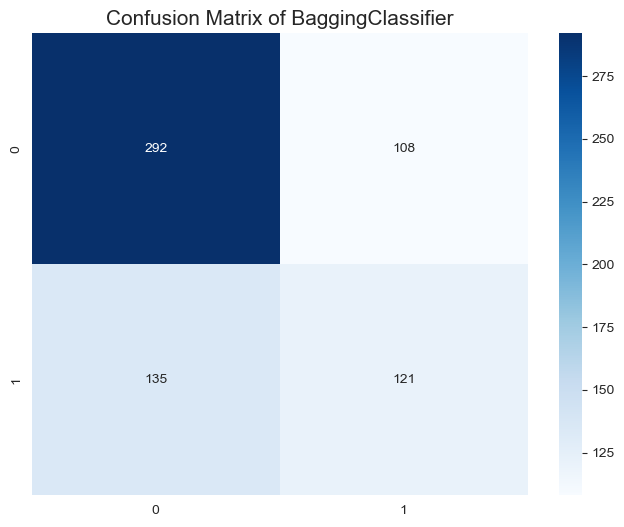

In [96]:
bc = BaggingClassifier(random_state=42)
bc.fit(X_train, y_train)
predictions = bc.predict(X_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of BaggingClassifier", size=15)
plt.show()

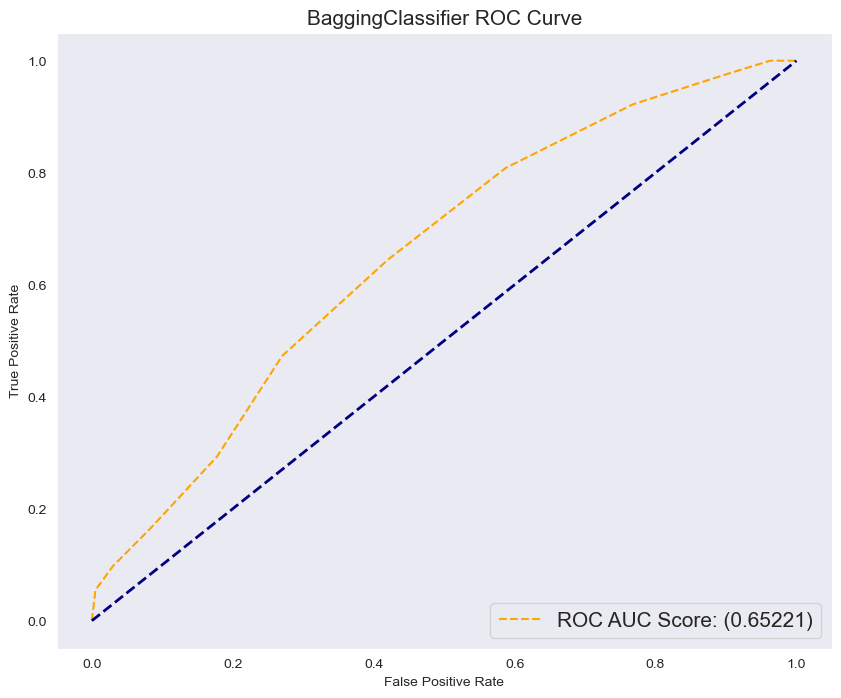

In [97]:
visualize_roc_auc_curve(bc, "BaggingClassifier")

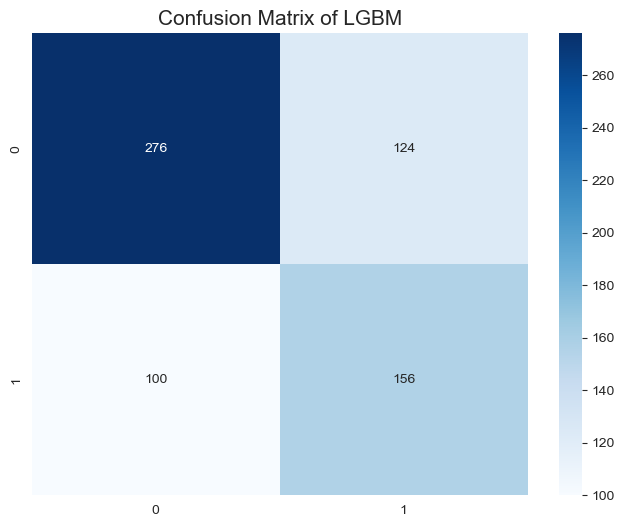

In [100]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of LGBM", size=15)
plt.show()

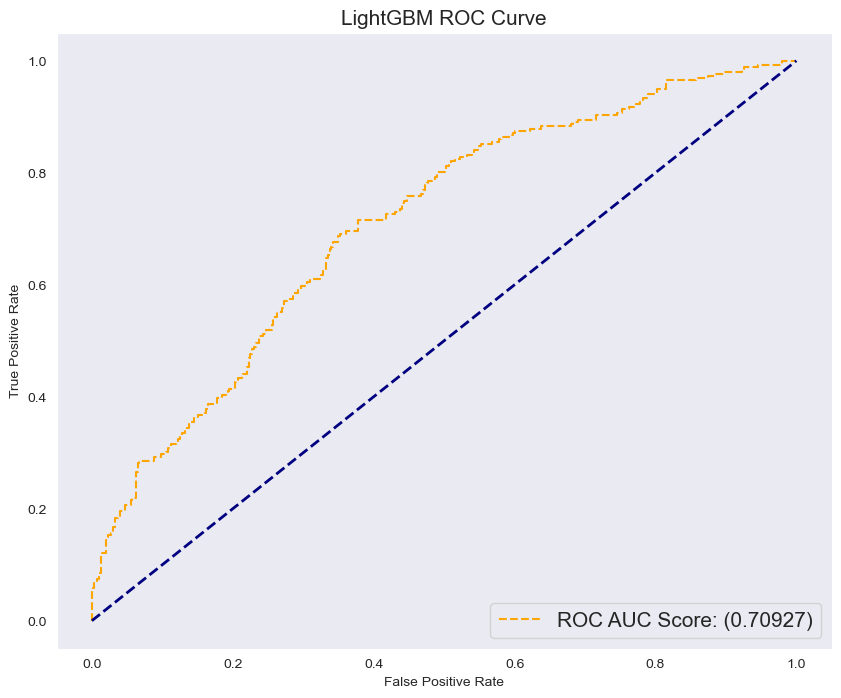

In [102]:
visualize_roc_auc_curve(lgbm, "LightGBM")

Hyperparameter Tuning:

In [103]:
tuned_models = pd.DataFrame(columns=["Model", "Accuracy Score"])

Tuning the Random Forest:

In [104]:
param_grid_rfc = {"min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "n_estimators" :[100, 200, 500],
                  "random_state": [42]}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 200, 500],
                         'random_state': [42]},
             scoring='accuracy')

In [105]:
rfc_params = grid_rfc.best_params_
rfc = RandomForestClassifier(**rfc_params)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "Random Forest", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.6798780487804879


In [ ]:
Tuning the Support Vector Machines:

In [106]:
param_grid_svc = {"kernel" : ["rbf"],
                  "gamma": [0.001, 0.01, 0.1, 1],
                   "C": [1,10,50,100,200,300,1000]}

grid_svc = GridSearchCV(SVC(), param_grid_svc, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='accuracy')

In [107]:
svc_params = grid_svc.best_params_
svc = SVC(**svc_params)
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "Support Vector Machines", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.614329268292683


Tuning the Bagging Classifier:

In [108]:
param_grid_bc = {'n_estimators': [60,70,80,100,200,300,400,500,600,700]}

grid_bc = GridSearchCV(BaggingClassifier(), param_grid_bc, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_bc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [60, 70, 80, 100, 200, 300, 400, 500,
                                          600, 700]},
             scoring='accuracy')

In [109]:
bc_params = grid_bc.best_params_
bc = BaggingClassifier(**bc_params)
bc.fit(X_train, y_train)
predictions = bc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "Bagging Classifier", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.676829268292683


Tuning the LightGBM:

In [110]:
param_grid_lgbm = param_grid = {'learning_rate': [0.01, 0.05, 0.1],
                                'n_estimators': [10, 50, 100, 150, 200],
                                'num_leaves': [6, 10, 16, 20, 31, 40],
                                'objective' : ['binary'],
                                "random_state": [42]}

grid_lgbm = GridSearchCV(LGBMClassifier(), param_grid_lgbm, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 50, 100, 150, 200],
                         'num_leaves': [6, 10, 16, 20, 31, 40],
                         'objective': ['binary'], 'random_state': [42]},
             scoring='accuracy')

In [111]:
lgbm_params = grid_lgbm.best_params_
lgbm = LGBMClassifier(**lgbm_params)
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "LightGBM", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.6570121951219512


Tuning the Decision Tree:

In [112]:
param_grid_dt = {'criterion':['gini','entropy'],
                  'max_depth': np.arange(3, 50)}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

In [113]:
dt_params = grid_dt.best_params_
dt = DecisionTreeClassifier(**dt_params)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "Decision Tree Classifier", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.5762195121951219


Model Comparison After Hyperparameter Tuning:

In [114]:
tuned_models.sort_values(by="Accuracy Score", ascending=False)

Model  Accuracy Score
0             Random Forest        0.679878
2        Bagging Classifier        0.676829
3                  LightGBM        0.657012
1   Support Vector Machines        0.614329
4  Decision Tree Classifier        0.576220

In [116]:
predictions = rfc.predict(X_test)

In [117]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.77      0.74       400
           1       0.60      0.55      0.57       256

    accuracy                           0.68       656
   macro avg       0.66      0.66      0.66       656
weighted avg       0.68      0.68      0.68       656



Conclusion:

Model which yields the most accurate result is tuned Random Forest Classifier with an accuracy score of 0.679878 (after all the Hyperparameter Tuning, there is a little bit improvement (0.028963). Non-tuned LightGBM and tuned Bagging Classifier are other worthy-of-mention models.